In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solublity/chi.csv


https://www.kaggle.com/competitions/aqueous-solubility-predictioin

In [2]:
import numpy as np
import pandas as pd

In [3]:
data =  pd.read_csv('/kaggle/input/solublity/chi.csv')
data.head(10)

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
5,A-10,vinyltoluene,"InChI=1S/C9H10/c1-3-9-6-4-5-8(2)7-9/h3-7H,1H2,2H3",JZHGRUMIRATHIU-UHFFFAOYSA-N,Cc1cccc(C=C)c1,-3.123150,0.000000,1,G1,118.179,...,1.0,46.0,1.0,0.0,0.0,1.0,0.00,55.836626,3.070761e+00,211.033225
6,A-11,3-(3-ethylcyclopentyl)propanoic acid,InChI=1S/C10H18O2/c1-2-8-3-4-9(7-8)5-6-10(11)1...,WVRFSLWCFASCIS-UHFFFAOYSA-N,CCC1CCC(CCC(O)=O)C1,-3.286116,0.000000,1,G1,170.252,...,4.0,70.0,0.0,1.0,1.0,1.0,37.30,73.973655,2.145839e+00,153.917569
7,A-12,"11,16,17,21-tetrahydroxypregna-1,4-diene-3,20-...",InChI=1S/C21H28O6/c1-19-6-5-12(23)7-11(19)3-4-...,SEKYBDYVXDAYPY-UHFFFAOYSA-N,CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C1CC(O)C2(O)C(...,-2.664549,0.000000,1,G1,376.449,...,2.0,148.0,0.0,3.0,4.0,4.0,115.06,158.135542,1.776978e+00,755.770792
8,A-14,bis(4-fluorophenyl)methanone,InChI=1S/C13H8F2O/c14-11-5-1-9(2-6-11)13(16)10...,LSQARZALBDFYQZ-UHFFFAOYSA-N,Fc1ccc(cc1)C(=O)c2ccc(F)cc2,-4.396652,0.431513,2,G3,218.202,...,2.0,80.0,2.0,0.0,0.0,2.0,17.07,91.346032,2.315628e+00,452.960733
9,A-15,1-[2-(benzoyloxy)propoxy]propan-2-yl benzoate ...,InChI=1S/C20H22O5/c21-19(17-9-3-1-4-10-17)24-1...,BYQDGAVOOHIJQS-UHFFFAOYSA-N,O=C(OCCCOCCCOC(=O)c1ccccc1)c2ccccc2,-4.595503,0.118551,2,G3,342.391,...,10.0,132.0,2.0,0.0,0.0,2.0,61.83,147.071714,1.447050e+00,582.150793


In [4]:
data.shape

(9982, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   float64
 13  NumHAcceptors        9982 non-null   float64
 14  NumHDonors           9982 non-null   float64
 15  NumHeteroatoms       9982 non-null   f

In [6]:
data.columns

Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

Dsource ID of compound (first letter indicates source)
NameName of compound
InChIThe IUPAC International Chemical Identifier
InChIKeyHashed InChI value
SMILESSMILES notation of value
SolubilityExperimental solubility value (LogS)
SDstandard deviation of multiple solubility values (if multiple values exists)
Ocurrencesnumber of multiple occurences of compound
Groupreliability group see ref paper for details
MolWtMolecular weight
MolLogPoctonal-water partition coefficient
MolMRMolar refractivity
HeavyAtomCountNumber of non-H atoms
NumHAcceptorsNumber of H acceptors
NumHDonorsNumber of H donors
NumHeteroatomsNumber of hetero atoms
NumRotatableBondsNumber of rotatable bonds
NumValenceElectronsNumber of valance electrons
NumAromaticRingsNumber of aromatic rings
NumSaturatedRingsNumber of saturated rings
NumAliphaticRingsNumber of aliphatic rings
RingCountNumber of total rings
TPSATopological Polar Surface Area
LabuteASALabute's Approximate Surface Area
BalabanJBalaban's J Index
BertzCTA topological complexity index

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   float64
 13  NumHAcceptors        9982 non-null   float64
 14  NumHDonors           9982 non-null   float64
 15  NumHeteroatoms       9982 non-null   f

In [8]:
corr = data.select_dtypes(include = ['int64','float64'])
corr.corr()

,Solubility,SD,Ocurrences,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
Solubility,1.000000,-0.099553,-0.021133,-0.368032,-0.608580,-0.424452,-0.352748,0.040020,0.193066,-0.040432,-0.222040,-0.346369,-0.343257,-0.037794,-0.087706,-0.329599,0.111662,-0.349497,0.037329,-0.289403
SD,-0.099553,1.000000,0.489628,0.000316,0.052496,0.005535,-0.006657,-0.050575,-0.049584,-0.050257,0.036640,-0.000940,-0.025703,-0.013044,-0.016747,-0.031209,-0.051690,0.004100,-0.058347,-0.030728
Ocurrences,-0.021133,0.489628,1.000000,-0.089321,-0.017733,-0.093789,-0.097888,-0.093552,-0.050153,-0.091217,-0.052953,-0.095099,-0.070711,-0.025973,-0.033346,-0.077698,-0.080972,-0.086132,-0.028484,-0.093979
MolWt,-0.368032,0.000316,-0.089321,1.000000,0.274489,0.918897,0.950358,0.728544,0.300740,0.778160,0.607132,0.945888,0.570508,0.166785,0.256686,0.618948,0.653639,0.972633,-0.350478,0.860903
MolLogP,-0.608580,0.052496,-0.017733,0.274489,1.000000,0.489295,0.333832,-0.249365,-0.266122,-0.238849,0.400844,0.357257,0.249597,-0.008381,0.018135,0.210392,-0.377232,0.280342,0.199313,0.197622
MolMR,-0.424452,0.005535,-0.093789,0.918897,0.489295,1.000000,0.974646,0.617344,0.274044,0.576984,0.696115,0.973741,0.613457,0.179147,0.269113,0.661120,0.496881,0.956373,-0.269328,0.852327
HeavyAtomCount,-0.352748,-0.006657,-0.097888,0.950358,0.333832,0.974646,1.000000,0.737311,0.339465,0.710718,0.656378,0.992939,0.623851,0.203594,0.296704,0.687093,0.638169,0.983198,-0.322215,0.901773
NumHAcceptors,0.040020,-0.050575,-0.093552,0.728544,-0.249365,0.617344,0.737311,1.000000,0.492136,0.889812,0.395080,0.719298,0.438130,0.165544,0.222708,0.491738,0.900391,0.736286,-0.296685,0.741841
NumHDonors,0.193066,-0.049584,-0.050153,0.300740,-0.266122,0.274044,0.339465,0.492136,1.000000,0.452983,0.180429,0.346488,0.134581,0.207908,0.206509,0.239624,0.630250,0.301494,-0.110805,0.302379
NumHeteroatoms,-0.040432,-0.050257,-0.091217,0.778160,-0.238849,0.576984,0.710718,0.889812,0.452983,1.000000,0.330042,0.692642,0.432433,0.086571,0.144714,0.437176,0.886101,0.740770,-0.304440,0.734350


<Axes: >

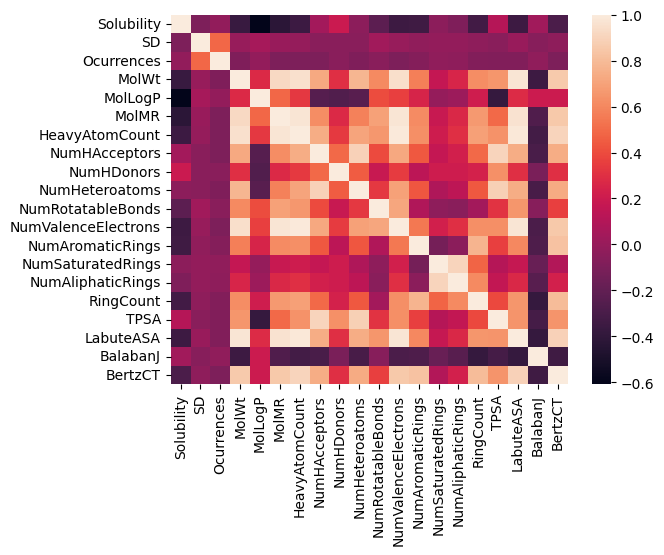

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr.corr())

In [60]:
y = data['Solubility']
y.shape

(9982,)

In [61]:
y.head()

0   -3.616127
1   -3.254767
2   -2.177078
3   -3.924409
4   -4.662065
Name: Solubility, dtype: float64

In [62]:
print(data.columns)

Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')


In [64]:
data.isnull().sum()

ID                     0
Name                   0
InChI                  0
InChIKey               0
SMILES                 0
Solubility             0
SD                     0
Ocurrences             0
Group                  0
MolWt                  0
MolLogP                0
MolMR                  0
HeavyAtomCount         0
NumHAcceptors          0
NumHDonors             0
NumHeteroatoms         0
NumRotatableBonds      0
NumValenceElectrons    0
NumAromaticRings       0
NumSaturatedRings      0
NumAliphaticRings      0
RingCount              0
TPSA                   0
LabuteASA              0
BalabanJ               0
BertzCT                0
dtype: int64

In [66]:
data['MolWt_log'] = np.log1p(data['MolWt'])
data['MolWt_log']

0       5.975106
1       5.136874
2       4.952787
3       6.629662
4       6.048613
          ...   
9977    5.581121
9978    6.099063
9979    5.018742
9980    6.121639
9981    5.734418
Name: MolWt_log, Length: 9982, dtype: float64

In [69]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Encode categorical variables (e.g., 'Group')
print("\nEncoding categorical column 'Group':")
label_encoder = LabelEncoder()
data['Group'] = label_encoder.fit_transform(data['Group'])
print(data['Group'].head(5))

# Normalize/Standardize numeric columns
print("\nNormalizing 'MolWt' and 'TPSA' columns using StandardScaler:")
scaler = StandardScaler()
data[['MolWt', 'TPSA']] = scaler.fit_transform(data[['MolWt', 'TPSA']])
print(data[['MolWt', 'TPSA']].head(5))

# Create new features
print("\nCreating new features:")
data['MolWt_TPSA_Ratio'] = data['MolWt'] / (data['TPSA'] + 1e-6)
data['HeteroatomCount'] = data['SMILES'].apply(lambda x: len(re.findall(r'[NOS]', x)))
print(data[['MolWt_TPSA_Ratio', 'HeteroatomCount']].head(5))

# Normalize another set of features using MinMaxScaler
print("\nNormalizing 'LabuteASA' and 'TPSA' columns using MinMaxScaler:")
min_max_scaler = MinMaxScaler()
data[['LabuteASA', 'TPSA']] = min_max_scaler.fit_transform(data[['LabuteASA', 'TPSA']])
print(data[['LabuteASA', 'TPSA']].head(5))



First 5 rows of the dataset:
    ID                                               Name  \
0  A-3         N,N,N-trimethyloctadecan-1-aminium bromide   
1  A-4                           Benzo[cd]indol-2(1H)-one   
2  A-5                               4-chlorobenzaldehyde   
3  A-8  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4  A-9  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   

                                               InChI  \
0  InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1  InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2        InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3  InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4  InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   

                      InChIKey  \
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2  AVPYQKSLYISFPO-UHFFFAOYSA-N   
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4  FAUAZXVRLVIARB-UHFFFAOYSA-N   

                                              SMILES  Solubili

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import

In [71]:
non_numeric_columns = ['ID', 'Name', 'SMILES', 'InChI', 'InChIKey']
data = data.drop(columns=non_numeric_columns)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
label_encoder = LabelEncoder()
data['Group'] = label_encoder.fit_transform(data['Group'])

# Normalize/Standardize features
scaler = StandardScaler()
data[['MolWt', 'TPSA']] = scaler.fit_transform(data[['MolWt', 'TPSA']])
data['MolWt_TPSA_Ratio'] = data['MolWt'] / (data['TPSA'] + 1e-6)
min_max_scaler = MinMaxScaler()
data[['LabuteASA', 'TPSA']] = min_max_scaler.fit_transform(data[['LabuteASA', 'TPSA']])

# Split the dataset
X = data.drop(columns=['Solubility'])  # Replace 'Solubility' with your target column
y = data['Solubility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
linear_regressor = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=500, random_state=42)
decision_tree = DecisionTreeRegressor(random_state=42)
xgboost_model = xgb.XGBRegressor(n_estimators=500, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=500, random_state=42)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Create a Voting Regressor (ensemble of all models)
voting_regressor = VotingRegressor(estimators=[
    ('lr', linear_regressor),
    ('rf', random_forest),
    ('dt', decision_tree),
    ('xgb', xgboost_model),
    ('gb', gradient_boosting)
])

# Train all models and evaluate performance
models = {
    'Linear Regression': linear_regressor,
    'Random Forest': random_forest,
    'Decision Tree': decision_tree,
    'XGBoost': xgboost_model,
    'Gradient Boosting': gradient_boosting,
    'SVR': svr,
    'Voting Regressor': voting_regressor
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {'MSE': mse, 'R²': r2}
    print(f"{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}")

# Print the results summary
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.4f}, R²: {metrics['R²']:.4f}")


Linear Regression - MSE: 2.7103, R²: 0.5004
Random Forest - MSE: 1.1959, R²: 0.7795
Decision Tree - MSE: 2.4468, R²: 0.5490
XGBoost - MSE: 1.2783, R²: 0.7644
Gradient Boosting - MSE: 1.2804, R²: 0.7640
SVR - MSE: 3.3823, R²: 0.3765
Voting Regressor - MSE: 1.2596, R²: 0.7678

Model Performance Summary:
Linear Regression - MSE: 2.7103, R²: 0.5004
Random Forest - MSE: 1.1959, R²: 0.7795
Decision Tree - MSE: 2.4468, R²: 0.5490
XGBoost - MSE: 1.2783, R²: 0.7644
Gradient Boosting - MSE: 1.2804, R²: 0.7640
SVR - MSE: 3.3823, R²: 0.3765
Voting Regressor - MSE: 1.2596, R²: 0.7678


on 200 decision tree evaluate performance

In [72]:
linear_regressor = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=200, random_state=42)
decision_tree = DecisionTreeRegressor(random_state=42)
xgboost_model = xgb.XGBRegressor(n_estimators=200, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=200, random_state=42)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Create a Voting Regressor (ensemble of all models)
voting_regressor = VotingRegressor(estimators=[
    ('lr', linear_regressor),
    ('rf', random_forest),
    ('dt', decision_tree),
    ('xgb', xgboost_model),
    ('gb', gradient_boosting)
])

# Train all models and evaluate performance
models = {
    'Linear Regression': linear_regressor,
    'Random Forest': random_forest,
    'Decision Tree': decision_tree,
    'XGBoost': xgboost_model,
    'Gradient Boosting': gradient_boosting,
    'SVR': svr,
    'Voting Regressor': voting_regressor
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {'MSE': mse, 'R²': r2}
    print(f"{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}")

# Print the results summary
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.4f}, R²: {metrics['R²']:.4f}")


Linear Regression - MSE: 2.7103, R²: 0.5004
Random Forest - MSE: 1.1969, R²: 0.7794
Decision Tree - MSE: 2.4468, R²: 0.5490
XGBoost - MSE: 1.2582, R²: 0.7681
Gradient Boosting - MSE: 1.3178, R²: 0.7571
SVR - MSE: 3.3823, R²: 0.3765
Voting Regressor - MSE: 1.2693, R²: 0.7660

Model Performance Summary:
Linear Regression - MSE: 2.7103, R²: 0.5004
Random Forest - MSE: 1.1969, R²: 0.7794
Decision Tree - MSE: 2.4468, R²: 0.5490
XGBoost - MSE: 1.2582, R²: 0.7681
Gradient Boosting - MSE: 1.3178, R²: 0.7571
SVR - MSE: 3.3823, R²: 0.3765
Voting Regressor - MSE: 1.2693, R²: 0.7660


In [73]:

# Combine base models in a Stacking Regressor
base_models = [
    ('lr', linear_regressor),
    ('rf', random_forest),
    ('dt', decision_tree),
    ('xgb', xgboost_model),
    ('gb', gradient_boosting),
    ('svr', svr)
]

meta_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Meta-model
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Evaluate the stacking regressor
y_pred = stacking_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nStacking Regressor Performance:")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")



Stacking Regressor Performance:
MSE: 1.1573
R²: 0.7867


In [13]:
correlations = corr.corrwith(corr['Solubility'])
correlations

Solubility             1.000000
SD                    -0.099553
Ocurrences            -0.021133
MolWt                 -0.368032
MolLogP               -0.608580
MolMR                 -0.424452
HeavyAtomCount        -0.352748
NumHAcceptors          0.040020
NumHDonors             0.193066
NumHeteroatoms        -0.040432
NumRotatableBonds     -0.222040
NumValenceElectrons   -0.346369
NumAromaticRings      -0.343257
NumSaturatedRings     -0.037794
NumAliphaticRings     -0.087706
RingCount             -0.329599
TPSA                   0.111662
LabuteASA             -0.349497
BalabanJ               0.037329
BertzCT               -0.289403
dtype: float64

In [15]:
features = [k for k,v in correlations.items() if abs(v)>=0.2 and k != 'Solubility']
features.append('SMILES')
features

['MolWt',
 'MolLogP',
 'MolMR',
 'HeavyAtomCount',
 'NumRotatableBonds',
 'NumValenceElectrons',
 'NumAromaticRings',
 'RingCount',
 'LabuteASA',
 'BertzCT',
 'SMILES']

In [16]:
x= data[features]
x.head()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,RingCount,LabuteASA,BertzCT,SMILES
0,392.510,3.9581,102.4454,23.0,17.0,142.0,0.0,0.0,158.520601,210.377334,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C
1,169.183,2.4055,51.9012,13.0,0.0,62.0,2.0,3.0,75.183563,511.229248,O=C1Nc2cccc3cccc1c23
2,140.569,2.1525,36.8395,9.0,1.0,46.0,1.0,1.0,58.261134,202.661065,Clc1ccc(C=O)cc1
3,756.226,8.1161,200.7106,53.0,10.0,264.0,6.0,6.0,323.755434,1964.648666,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...
4,422.525,2.4854,119.0760,31.0,12.0,164.0,2.0,6.0,183.183268,769.899934,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...


In [17]:
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import torch
from transformers import AutoModel
import torch.nn as nn
from transformers import TrainingArguments, Trainer
from sklearn.preprocessing import StandardScaler
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.utils.data import Dataset, DataLoader

In [18]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size =0.2,random_state = 42)

In [74]:
# Split the dataset
X = data.drop(columns=['Solubility'])  # Replace 'Solubility' with your target column
y = data['Solubility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
linear_regressor = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=200, random_state=42)
decision_tree = DecisionTreeRegressor(random_state=42)
xgboost_model = xgb.XGBRegressor(n_estimators=200, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=200, random_state=42)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Combine base models in a Stacking Regressor
base_models = [
    ('lr', linear_regressor),
    ('rf', random_forest),
    ('dt', decision_tree),
    ('xgb', xgboost_model),
    ('gb', gradient_boosting),
    ('svr', svr)
]

meta_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Meta-model
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Evaluate the stacking regressor
y_pred = stacking_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nStacking Regressor Performance:")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")



Stacking Regressor Performance:
MSE: 1.1573
R²: 0.7867


Custom MOdel for CHEMBERT accept both smiles embedding and other molculer feature

Trianing MOdel

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [50]:


# Create a Voting Regressor (ensemble of all models)
voting_regressor = VotingRegressor(estimators=[
    ('lr', linear_regressor),
    ('rf', random_forest),
    ('dt', decision_tree),
    ('xgb', xgboost_model),
    ('gb', gradient_boosting)
])

# Train all models and evaluate performance
models = {
    'Linear Regression': linear_regressor,
    'Random Forest': random_forest,
    'Decision Tree': decision_tree,
    'XGBoost': xgboost_model,
    'Gradient Boosting': gradient_boosting,
    'SVR': svr,
    'Voting Regressor': voting_regressor
}

results = {}

for model_name, model in models.items():
    # Train the model
    if model_name == 'Voting Regressor':
        model.fit(xtrain_scaled, ytrain)
    else:
        model.fit(xtrain_scaled, ytrain)
    
    # Predict on test data
    y_pred = model.predict(xtest_scaled)

    # Evaluate performance
    mse = mean_squared_error(ytest, y_pred)
    r2 = r2_score(ytest, y_pred)

    # Store results
    results[model_name] = {'MSE': mse, 'R²': r2}

    # Training performance
    ytrain_pred = model.predict(xtrain_scaled)
    train_r2 = r2_score(ytrain, ytrain_pred)
    print(f"{model_name} - Train R²: {train_r2:.4f}, Test R²: {r2:.4f}, Test MSE: {mse:.4f}")

# Visualize results
results_df = pd.DataFrame(results).T
print("\nSummary of Results:")
print(results_df)

# Optional: Visualization (for low-dimensional data)
if xtrain.shape[1] == 1:  # Single feature case for visualization
    plt.scatter(xtest_scaled, ytest, color='blue', label='True Data')
    plt.scatter(xtest_scaled, y_pred, color='red', label='Predictions')
    plt.legend()
    plt.title('Model Predictions')
    plt.xlabel('Feature')
    plt.ylabel('Solubility')
    plt.show()


Linear Regression - Train R²: 0.5042, Test R²: 0.5068, Test MSE: 2.6756
Random Forest - Train R²: 0.9636, Test R²: 0.7458, Test MSE: 1.3792
Decision Tree - Train R²: 0.9979, Test R²: 0.5161, Test MSE: 2.6251
XGBoost - Train R²: 0.9932, Test R²: 0.7190, Test MSE: 1.5242
Gradient Boosting - Train R²: 0.8338, Test R²: 0.7307, Test MSE: 1.4610
SVR - Train R²: 0.7046, Test R²: 0.6951, Test MSE: 1.6541
Voting Regressor - Train R²: 0.9393, Test R²: 0.7384, Test MSE: 1.4191

Summary of Results:
                        MSE        R²
Linear Regression  2.675593  0.506771
Random Forest      1.379199  0.745753
Decision Tree      2.625065  0.516085
XGBoost            1.524228  0.719018
Gradient Boosting  1.460977  0.730678
SVR                1.654053  0.695085
Voting Regressor   1.419078  0.738402


In [51]:


# Combine weak learners using Bagging
bagging_regressor_lr = BaggingRegressor(base_estimator=linear_regressor, n_estimators=50, random_state=42)
bagging_regressor_dt = BaggingRegressor(base_estimator=decision_tree, n_estimators=50, random_state=42)
bagging_regressor_svr = BaggingRegressor(base_estimator=svr, n_estimators=50, random_state=42)

# Add models to a dictionary for easier iteration
models = {
    'Linear Regression': linear_regressor,
    'Random Forest': random_forest,
    'Decision Tree': decision_tree,
    'XGBoost': xgboost_model,
    'Gradient Boosting': gradient_boosting,
    'SVR': svr,
    'Bagging (Linear Regression)': bagging_regressor_lr,
    'Bagging (Decision Tree)': bagging_regressor_dt,
    'Bagging (SVR)': bagging_regressor_svr
}

results = {}

# Train and evaluate all models
for model_name, model in models.items():
    # Train the model
    model.fit(xtrain_scaled, ytrain)
    
    # Predict on test data
    y_pred = model.predict(xtest_scaled)

    # Evaluate performance
    mse = mean_squared_error(ytest, y_pred)
    r2 = r2_score(ytest, y_pred)

    # Store results
    results[model_name] = {'MSE': mse, 'R²': r2}

    # Training performance
    ytrain_pred = model.predict(xtrain_scaled)
    train_r2 = r2_score(ytrain, ytrain_pred)
    print(f"{model_name} - Train R²: {train_r2:.4f}, Test R²: {r2:.4f}, Test MSE: {mse:.4f}")

# Summarize results
results_df = pd.DataFrame(results).T
print("\nSummary of Results:")
print(results_df)

# Optional: Visualization (for low-dimensional data)
if xtrain.shape[1] == 1:  # Single feature case for visualization
    plt.scatter(xtest_scaled, ytest, color='blue', label='True Data')
    plt.scatter(xtest_scaled, y_pred, color='red', label='Predictions')
    plt.legend()
    plt.title('Model Predictions')
    plt.xlabel('Feature')
    plt.ylabel('Solubility')
    plt.show()


Linear Regression - Train R²: 0.5042, Test R²: 0.5068, Test MSE: 2.6756
Random Forest - Train R²: 0.9636, Test R²: 0.7458, Test MSE: 1.3792
Decision Tree - Train R²: 0.9979, Test R²: 0.5161, Test MSE: 2.6251
XGBoost - Train R²: 0.9932, Test R²: 0.7190, Test MSE: 1.5242
Gradient Boosting - Train R²: 0.8338, Test R²: 0.7307, Test MSE: 1.4610
SVR - Train R²: 0.7046, Test R²: 0.6951, Test MSE: 1.6541


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging (Linear Regression) - Train R²: 0.5041, Test R²: 0.5072, Test MSE: 2.6733


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging (Decision Tree) - Train R²: 0.9616, Test R²: 0.7456, Test MSE: 1.3801


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging (SVR) - Train R²: 0.7052, Test R²: 0.6961, Test MSE: 1.6483

Summary of Results:
                                  MSE        R²
Linear Regression            2.675593  0.506771
Random Forest                1.379199  0.745753
Decision Tree                2.625065  0.516085
XGBoost                      1.524228  0.719018
Gradient Boosting            1.460977  0.730678
SVR                          1.654053  0.695085
Bagging (Linear Regression)  2.673265  0.507200
Bagging (Decision Tree)      1.380076  0.745592
Bagging (SVR)                1.648339  0.696139
